# Google Playstore Dataset

#### Complete EDA Analysis

### About Dataset

`Description`\
The dataset was downloaded from kaggle, from the following [Link]('https://www.kaggle.com/datasets/lava18/google-play-store-apps')

**Context**\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**\
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**\
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

`Importing Required libraries`

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('./Datasets/googleplaystore.csv')

In [52]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up


In [53]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [55]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [56]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [57]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [58]:
df.Size.isnull().sum()

0

In [59]:
M=df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

In [60]:
K=df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

In [61]:
varies=df['Size'].loc[df['Size'].str.contains('Varies')].value_counts().sum()

In [62]:
M+K+varies

10841

In [63]:
len(df['Size'])

10841

In [64]:
def convert_size(size):
    """Convert a size in bytes to a human-readable format."""
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k',""))*1024
        elif 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'Varies' in size:
            return np.nan
    return size

In [65]:
df['Size']=df['Size'].apply(convert_size)

In [66]:
df.Size

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [68]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [69]:
df.Installs.value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [70]:
df.rename(columns={'Size':'Size in Bytes'},inplace=True)

In [71]:
df['Size in MBs']=df['Size in Bytes'].apply(lambda x: x/(1024*1024))

In [72]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


In [73]:
def convert_installs(size):
    """Converts the number of installs to a more readable format."""
    if isinstance(size,str):
        if '+' in size:
            return int(size.replace('+',''))
        elif ',' in size:
            return int(size.replace(",",""))
        elif '0' in size:
            return np.nan
    return size

In [74]:
df['Installs']=df.Installs.apply(lambda x: x.replace('+','') if '+' in str(x) else x)
df['Installs']=df.Installs.apply(lambda x: x.replace(',','') if ',' in str(x) else x)

In [75]:
df['Installs'] = df.Installs.apply(lambda x: int(x))

In [76]:
df.Installs.dtype

dtype('int64')

In [77]:
df.describe()

,Rating,Reviews,Size in Bytes,Installs,Size in MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size in Bytes   9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size in MBs     9146 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [79]:
df.Price.value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [80]:
df.Price= df.Price.apply(lambda x: x.replace('$','') if '$' in x else x)

In [81]:
df.Price=df.Price.apply(lambda x: float(x))

In [82]:
df.Price.value_counts()

Price
0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [83]:
df.describe()

,Rating,Reviews,Size in Bytes,Installs,Price,Size in MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [84]:
print(f"min price is {df['Price'].min()}")
print(f"max price is {df['Price'].max()}")
print(f"mean price is {df['Price'].mean()}")
print(f"median price is {df['Price'].median()}")
print(f"mode price is {df['Price'].mode()}")

min price is 0.0
max price is 400.0
mean price is 1.0272733142699015
median price is 0.0
mode price is 0    0.0
Name: Price, dtype: float64


In [85]:
df.isnull().sum().sort_values(ascending=False)

Size in Bytes     1695
Size in MBs       1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [86]:
round(df.isnull().sum()/len(df) *100,2).sort_values(ascending=False)

Size in Bytes     15.64
Size in MBs       15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

<Axes: >

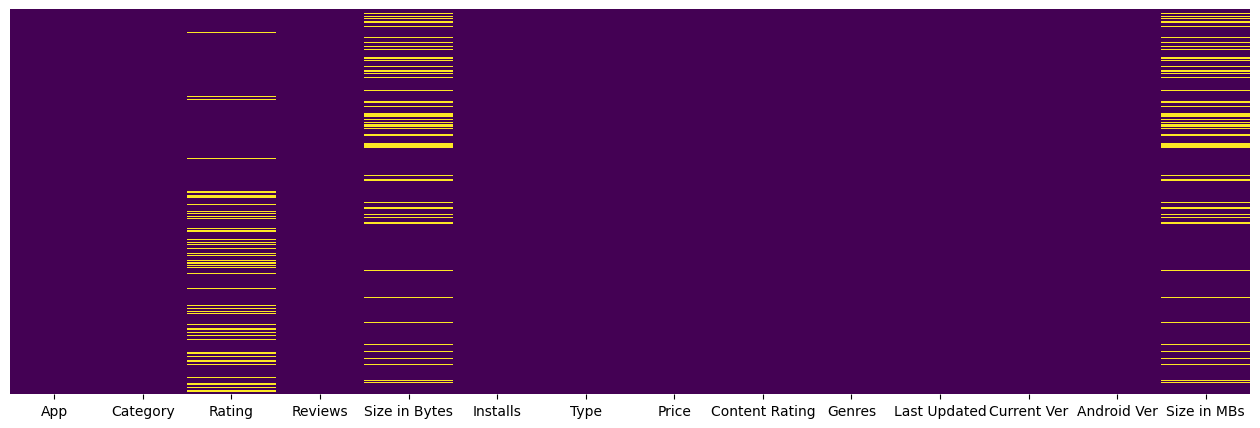

In [87]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values')

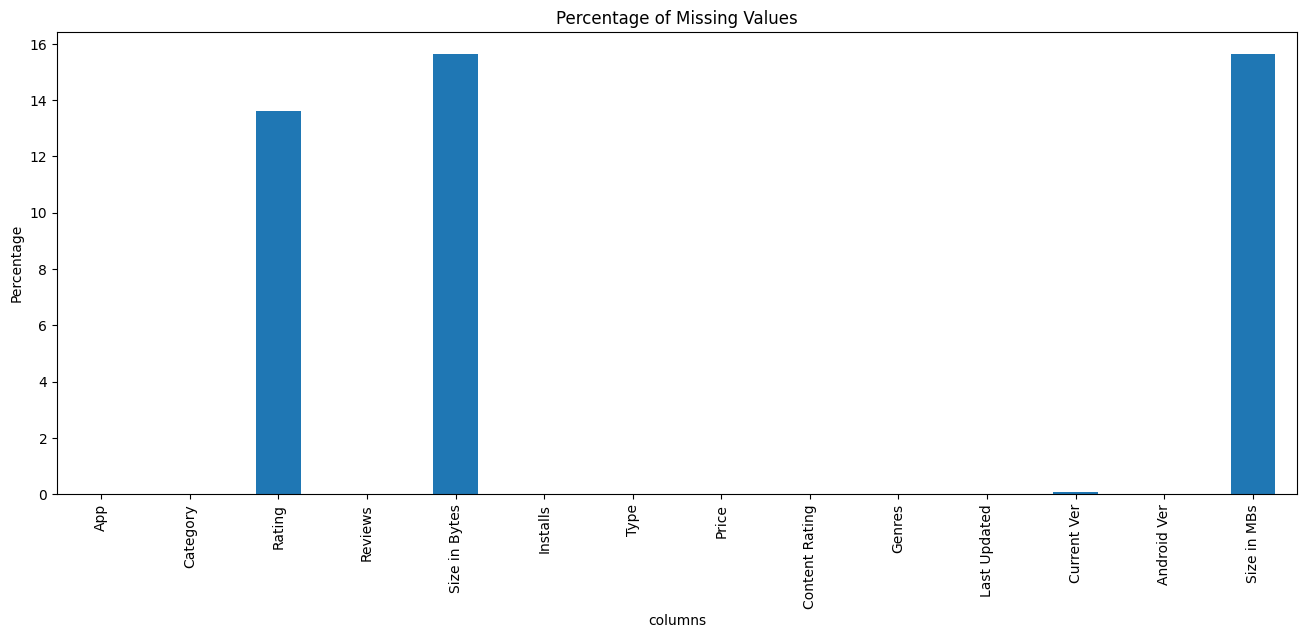

In [88]:
plt.figure(figsize=(16,6))
missing_Percentage = df.isnull().sum()/len(df) *100
missing_Percentage.plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values')

Text(0.5, 1.0, 'Percentage of Missing Values')

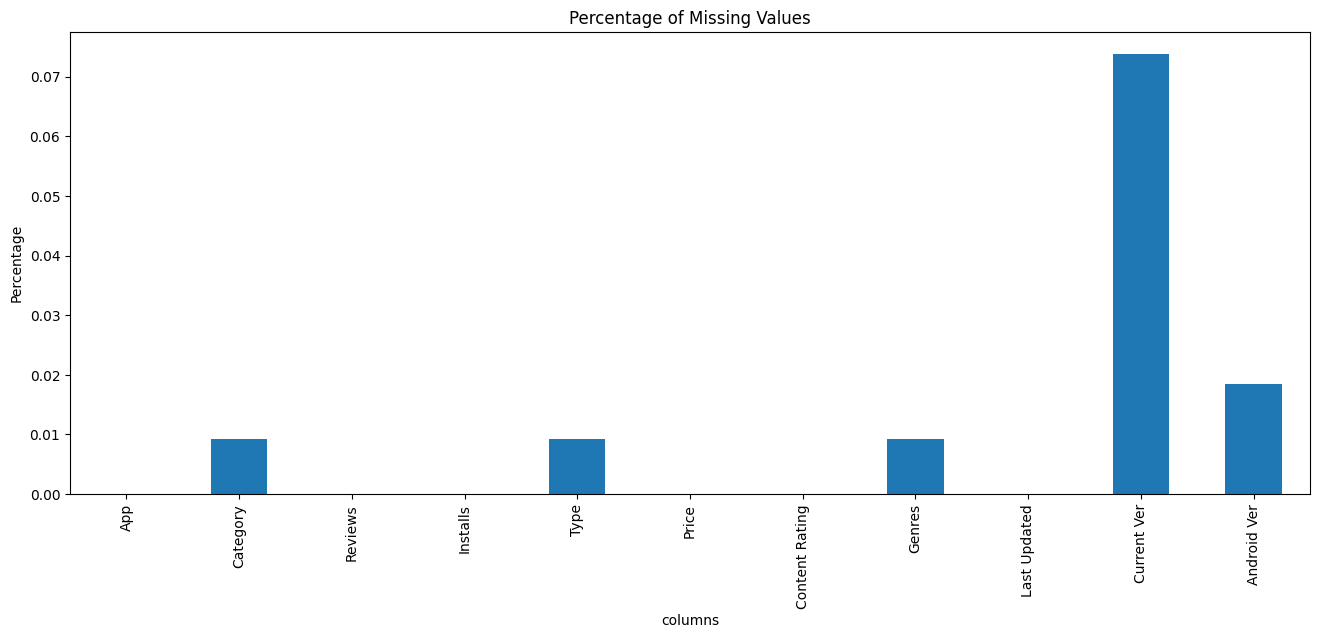

In [89]:
plt.figure(figsize=(16,6))
missing_Percentage = df.isnull().sum()/len(df) *100
missing_Percentage[missing_Percentage<1].plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values')

In [90]:
bins = [-1,0,10,1000,10000,100000,1000000,1000000000]
labels = ['no','very low','low','medium','high','very high','Top notch']
df['Installs_Cats']=pd.cut(df['Installs'],bins=bins,labels=labels)

In [91]:
df.Installs_Cats.value_counts()

Installs_Cats
Top notch    2832
low          2162
very high    2118
high         1648
medium       1531
very low      535
no             15
Name: count, dtype: int64

In [92]:
df.Installs_Cats.value_counts().sort_values(ascending=False)

Installs_Cats
Top notch    2832
low          2162
very high    2118
high         1648
medium       1531
very low      535
no             15
Name: count, dtype: int64

In [93]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size in Bytes     1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size in MBs       1695
Installs_Cats        0
dtype: int64

In [94]:
df.isnull().sum().sort_values(ascending=False)

Size in Bytes     1695
Size in MBs       1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
Installs_Cats        0
dtype: int64

In [95]:
df.describe()

,Rating,Reviews,Size in Bytes,Installs,Price,Size in MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [96]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs,Installs_Cats
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,very high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,Top notch
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,Top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,high


<Axes: >

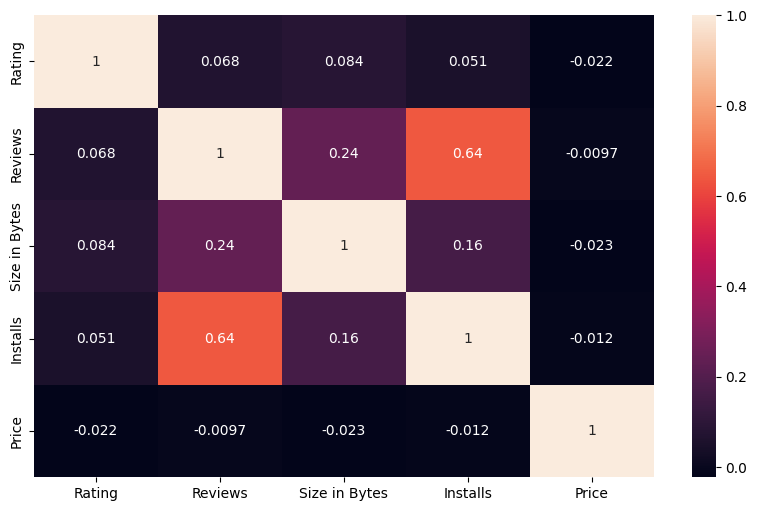

In [100]:
plt.figure(figsize=(10,6))
num_cols = ['Rating','Reviews','Size in Bytes','Installs','Price']
sns.heatmap(df[num_cols].corr(),annot=True)

In [104]:
df.duplicated().sum()

483

In [105]:
for col in df.columns:
    print(f"The number of duplicates in {col} column are {df[col].duplicated().sum()}")

The number of duplicates in App column are 1181
The number of duplicates in Category column are 10807
The number of duplicates in Rating column are 10801
The number of duplicates in Reviews column are 4840
The number of duplicates in Size in Bytes column are 10381
The number of duplicates in Installs column are 10821
The number of duplicates in Type column are 10838
The number of duplicates in Price column are 10749
The number of duplicates in Content Rating column are 10835
The number of duplicates in Genres column are 10721
The number of duplicates in Last Updated column are 9464
The number of duplicates in Current Ver column are 8057
The number of duplicates in Android Ver column are 10807
The number of duplicates in Size in MBs column are 10381
The number of duplicates in Installs_Cats column are 10834


In [111]:
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs,Installs_Cats
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.8,very high
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.8,very high
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.0,very high
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.0,very high
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,3.8,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,NaN,Top notch
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,NaN,Top notch
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,NaN,Top notch
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,39845888.0,10000000,Free,0.00,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,38.0,Top notch


In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.duplicated().sum()

0

In [115]:
df.Category.value_counts().head()

Category
FAMILY      1943
GAME        1121
TOOLS        843
BUSINESS     427
MEDICAL      408
Name: count, dtype: int64

In [119]:
df.Category.nunique()

33

In [118]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452771915
FAMILY                 10041692505
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074494782
BOOKS_AND_REFERENCE     1916469576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
EDUCATION                533952000
WEATHER                  426100520
FOOD_AND_DRINK           257898751
DATING                   206536107
HOUSE_AND_HOME           125212461
ART_AND_DESIGN           124338100
LIBRARIES_AND_DEMO        62995910
COMICS                    56086150
AUTO_AND_VE

In [120]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size in Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size in MBs', 'Installs_Cats'],
      dtype='object')

In [122]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

Category
GAME                   1415536650
COMMUNICATION           601273552
SOCIAL                  533576829
FAMILY                  396771969
TOOLS                   273185044
PHOTOGRAPHY             204297410
VIDEO_PLAYERS           110380188
PRODUCTIVITY            102554498
SHOPPING                 94931162
PERSONALIZATION          75193163
SPORTS                   65322708
TRAVEL_AND_LOCAL         55565160
ENTERTAINMENT            47570716
NEWS_AND_MAGAZINES       38245873
HEALTH_AND_FITNESS       30845186
MAPS_AND_NAVIGATION      30659254
EDUCATION                23165500
BOOKS_AND_REFERENCE      21873227
FINANCE                  16999891
WEATHER                  14604735
LIFESTYLE                12820575
BUSINESS                 12358171
FOOD_AND_DRINK            7671576
DATING                    5545397
COMICS                    3383276
HOUSE_AND_HOME            2794772
ART_AND_DESIGN            1714440
MEDICAL                   1396757
AUTO_AND_VEHICLES         1163666
LIBRA

In [124]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

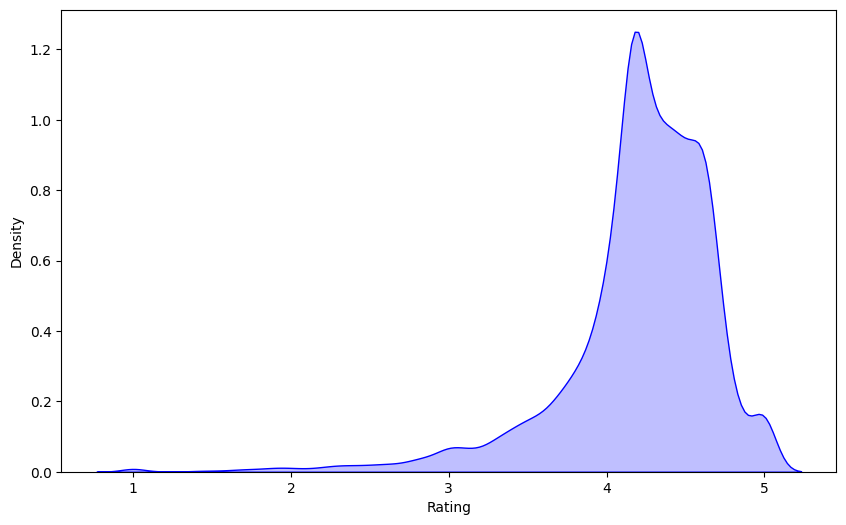

In [176]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Rating'],color='blue',shade=True)

In [143]:
df.groupby('Installs_Cats')['Rating'].mean()

Installs_Cats
no                NaN
very low     4.637037
low          4.168417
medium       4.031095
high         4.094593
very high    4.207043
Top notch    4.310990
Name: Rating, dtype: float64

In [154]:
df.Rating.isnull().value_counts()

Rating
False    8893
True     1465
Name: count, dtype: int64

In [144]:
df.fillna(df.groupby('Installs_Cats')['Rating'].mean())

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs,Installs_Cats
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,very high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,Top notch
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,Top notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up,53.0,medium
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up,3.6,low
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9961472.0,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up,9.5,low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,NaN,low


In [155]:
ave_rating = df.groupby('Installs_Cats')['Rating'].mean()

In [157]:
df['Rating'].fillna(df['Installs_Cats'].map(ave_rating),inplace=True)

In [160]:
ave_rating

Installs_Cats
no                NaN
very low     4.637037
low          4.168417
medium       4.031095
high         4.094593
very high    4.207043
Top notch    4.310990
Name: Rating, dtype: float64

In [158]:
df.Rating.isnull().sum()

15

In [159]:
df.groupby('')['Rating'].mean()

Installs_Cats
no                NaN
very low     4.637037
low          4.168417
medium       4.031095
high         4.094593
very high    4.207043
Top notch    4.310990
Name: Rating, dtype: float64

In [171]:
df['Installs_Cats'].loc[df['Rating'].isnull()].value_counts()

Installs_Cats
no           0
very low     0
low          0
medium       0
high         0
very high    0
Top notch    0
Name: count, dtype: int64

In [172]:
df[df['Installs_Cats']=='no']

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs,Installs_Cats
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,4.204087,0,5767168.0,0,Paid,1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up,5.5,no
5307,Ak Parti Yardım Toplama,SOCIAL,4.204087,0,9122611.2,0,Paid,13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up,8.7,no
5486,AP Series Solution Pro,FAMILY,4.204087,0,7759462.4,0,Paid,1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up,7.4,no
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.204087,0,34603008.0,0,Paid,2.99,Everyone,Education,15-Apr-16,1,3.0 and up,33.0,no
6692,cronometra-br,PRODUCTIVITY,4.204087,0,5662310.4,0,Paid,154.99,Everyone,Productivity,24-Nov-17,1.0.0,4.1 and up,5.4,no
7434,Pekalongan CJ,SOCIAL,4.204087,0,6186598.4,0,Free,0.00,Teen,Social,21-Jul-18,0.0.1,4.4 and up,5.9,no
8081,CX Network,BUSINESS,4.204087,0,10485760.0,0,Free,0.00,Everyone,Business,6-Aug-18,1.3.1,4.1 and up,10.0,no
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,4.204087,0,2202009.6,0,Free,0.00,Everyone,News & Magazines,7-Jul-18,1.1,4.4 and up,2.1,no
8871,Test Application DT 02,ART_AND_DESIGN,4.204087,0,1258291.2,0,Free,0.00,Everyone,Art & Design,14-Mar-17,4,4.2 and up,1.2,no
9148,Command & Conquer: Rivals,FAMILY,4.204087,0,NaN,0,NaN,0.00,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device,NaN,no


In [170]:
df['Rating'].fillna(df.Rating.mean(),inplace=True)

Text(2.375, 3.5, 'Null values: 0')

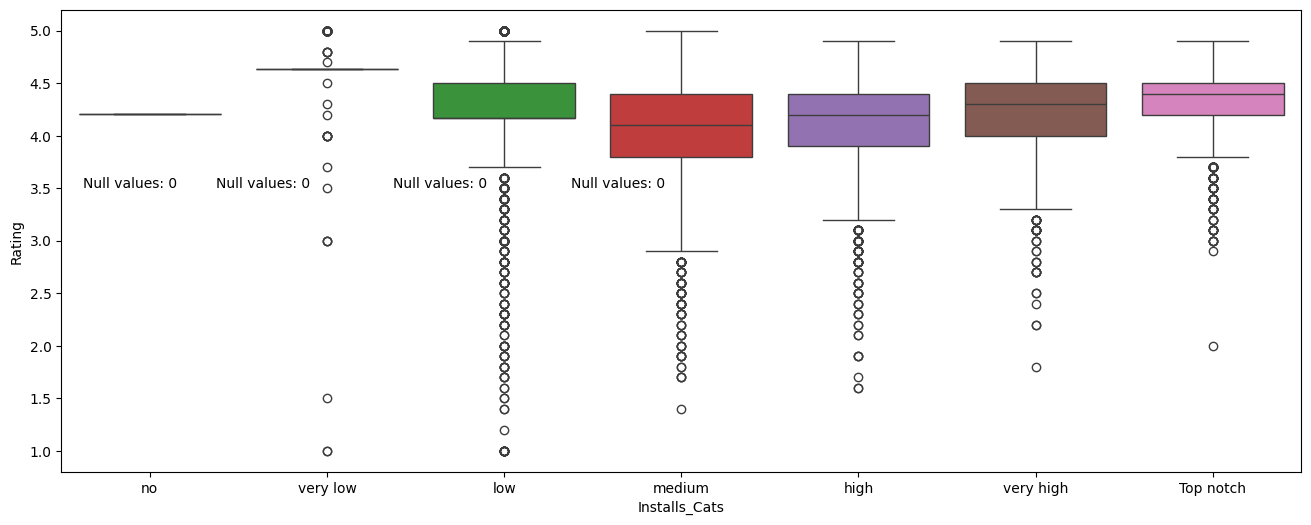

In [195]:
plt.figure(figsize=(16,6))
sns.boxplot(y='Rating',x='Installs_Cats',hue='Installs_Cats',data=df)
plt.text(-0.375, 3.5, 'Null values: 0')
plt.text(0.375, 3.5, 'Null values: 0')
plt.text(1.375, 3.5, 'Null values: 0')
plt.text(2.375, 3.5, 'Null values: 0')


In [192]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size in Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size in MBs', 'Installs_Cats'],
      dtype='object')

In [193]:
df.groupby('Installs_Cats')['Reviews'].mean()

Installs_Cats
no           0.000000e+00
very low     9.044944e-01
low          1.967792e+01
medium       2.691824e+02
high         2.688341e+03
very high    2.711245e+04
Top notch    1.615291e+06
Name: Reviews, dtype: float64

<Axes: xlabel='Installs_Cats', ylabel='Reviews'>

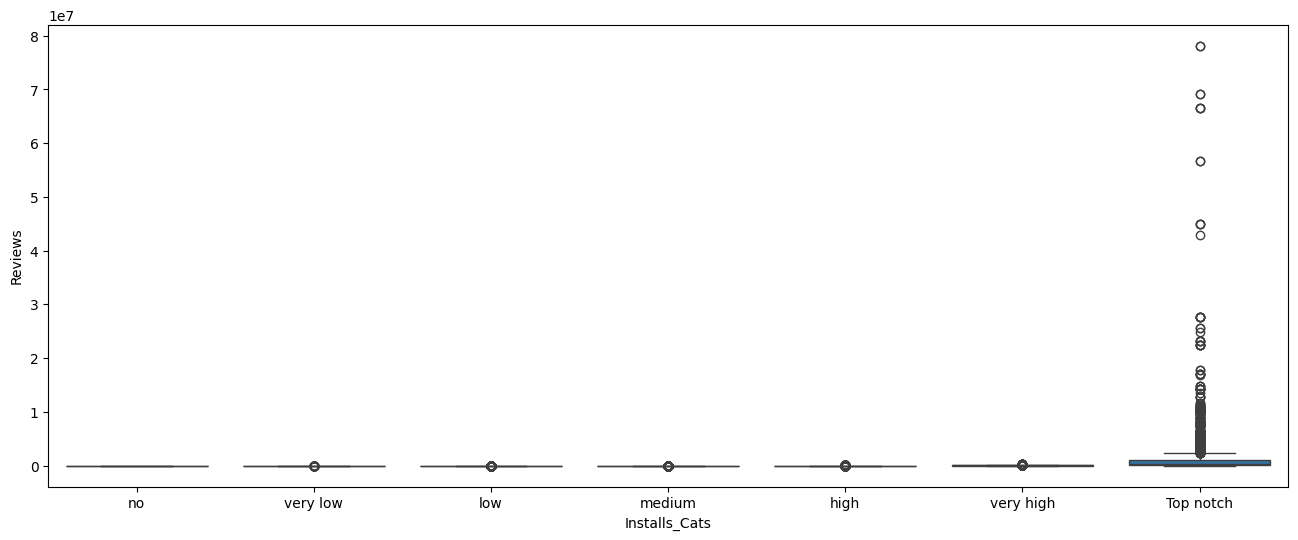

In [197]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_Cats',y='Reviews',data=df)

<Axes: xlabel='Installs_Cats', ylabel='Reviews'>

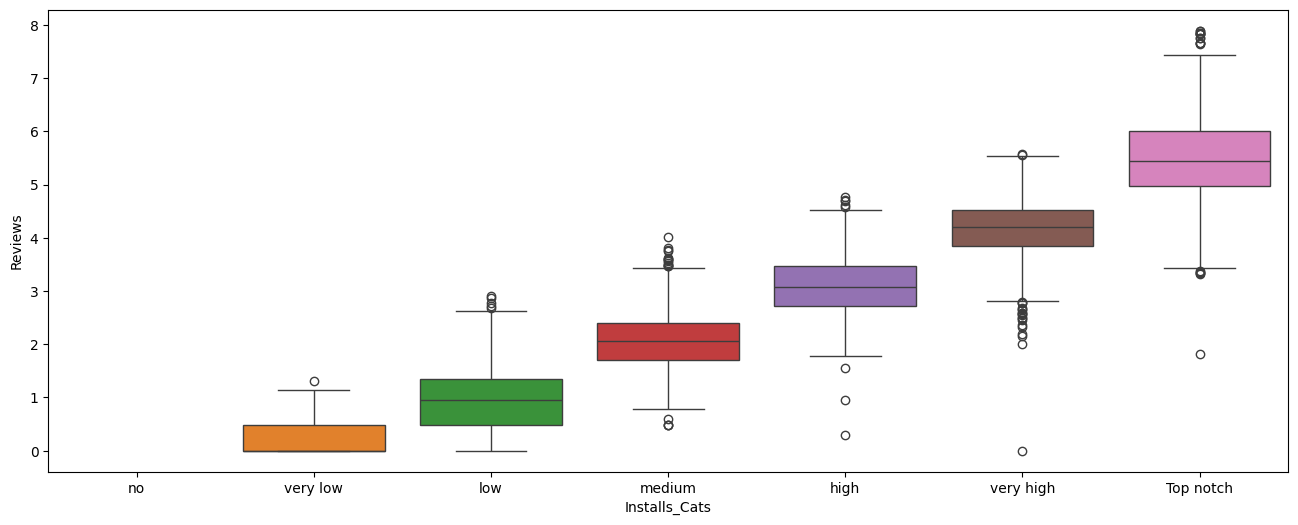

In [199]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_Cats',y=np.log10(df['Reviews']),hue='Installs_Cats',data=df)

<Axes: xlabel='Installs_Cats', ylabel='Reviews'>

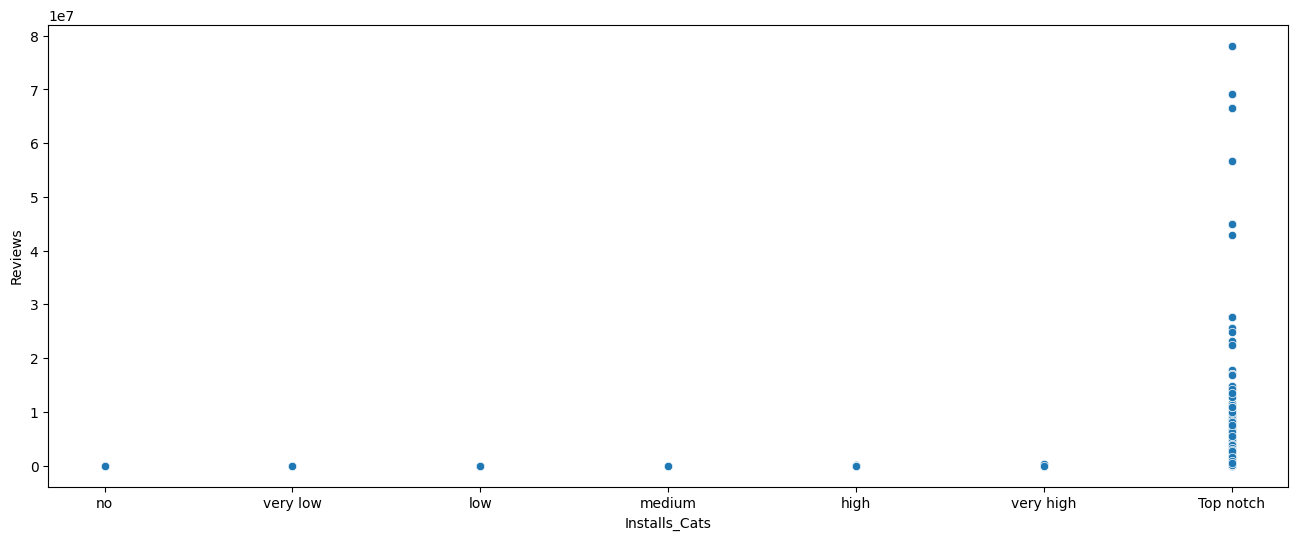

In [200]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Installs_Cats',y='Reviews',data=df)

<Axes: xlabel='Installs_Cats', ylabel='Reviews'>

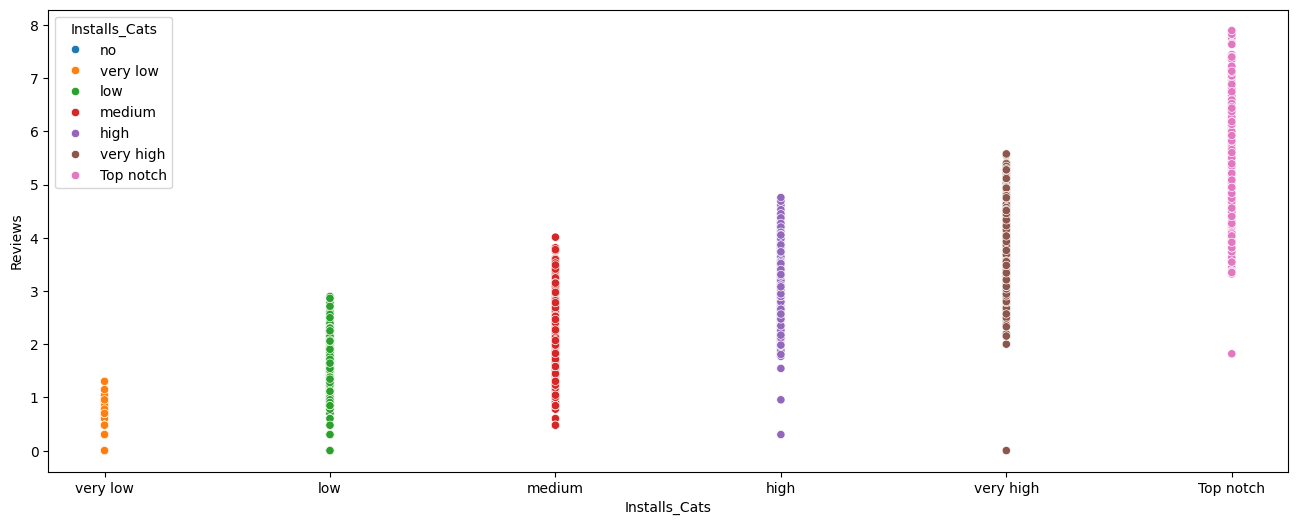

In [202]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Installs_Cats',y=np.log10(df['Reviews']),hue='Installs_Cats',data=df)

Text(0.5, 1.0, 'Log10 Installs vs Log10 Reviews')

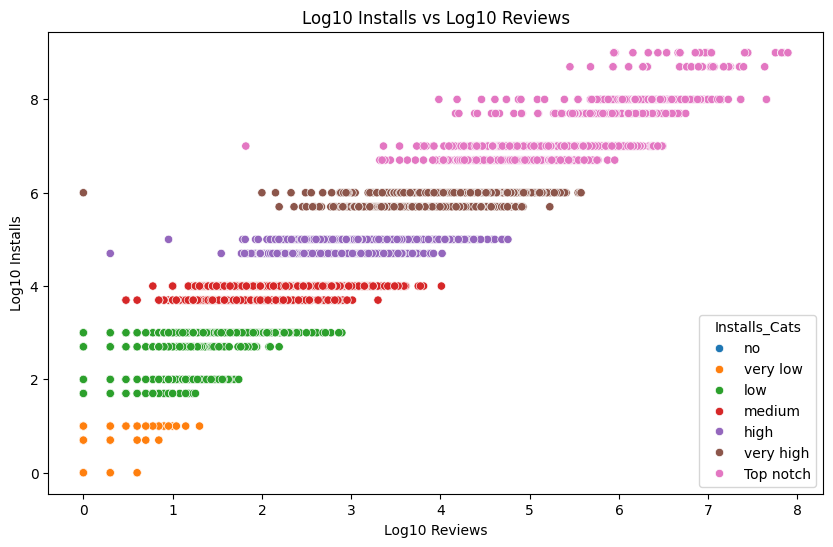

In [215]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=np.log10(df['Installs']),x=np.log10(df['Reviews']),hue='Installs_Cats', data=df)
plt.xlabel('Log10 Reviews')
plt.ylabel('Log10 Installs')
plt.title('Log10 Installs vs Log10 Reviews')

<Figure size 1000x600 with 0 Axes>

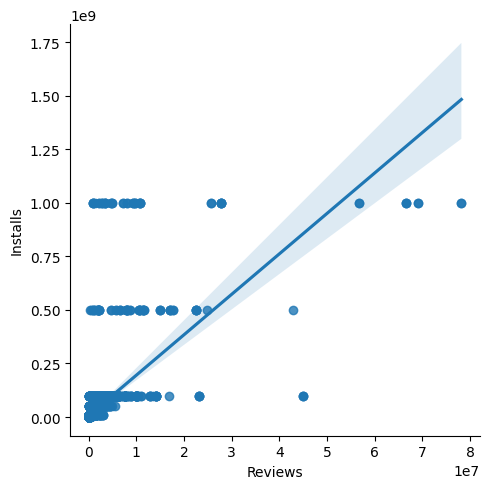

In [217]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Reviews',y='Installs',data=df)